<a href="https://colab.research.google.com/github/aziz122596/Gentex/blob/main/ticks_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
tick_dict = {
"ixodes": [9, 9, 1, 10, 5, 11, 13, 14, 3, 11, 13, 20, 24, 4, 3, 3],
"amblyomma": [1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 4, 8, 0, 0, 0],
"dermacentor": [5, 0, 2, 9, 7, 7, 1, 0, 6, 3, 4, 8, 11, 0, 0, 1],
"haemophysalis": [5, 5, 2, 10, 5, 8, 1, 0, 6, 2, 0, 6, 6, 1, 0, 0],
"hyalomma": [0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 3, 0, 1, 2],
"rhipicephalus": [1, 2, 1, 5, 2, 4, 0, 0, 3, 2, 1, 1, 3, 1, 0, 1],
"ornithodoros": [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]}

In [ ]:
tick_dict2 = {
    "Ornithodoros": [0.000,  0.324,  0.358,  0.353,  0.359,  0.421,  0.360],
    "ixodes": [0.324,  0.000,  0.305,  0.304,  0.301,  0.363,  0.304],
    "Amblyomma": [0.358,  0.305,  0.000,  0.267,  0.263,  0.462,  0.266],
    "Rhipicephalus": [0.353,  0.304,  0.267,  0.000,  0.225,  0.443,  0.263],
    "Dermacentor": [0.359,  0.301,  0.263,  0.225,  0.000,  0.405,  0.265],
    "Hyalomma": [0.421,  0.363,  0.462,  0.443,  0.405,  0.000,  0.456],
    "Haemaphysalis": [0.360,  0.304,  0.266,  0.263,  0.265,  0.456,  0.000]
}

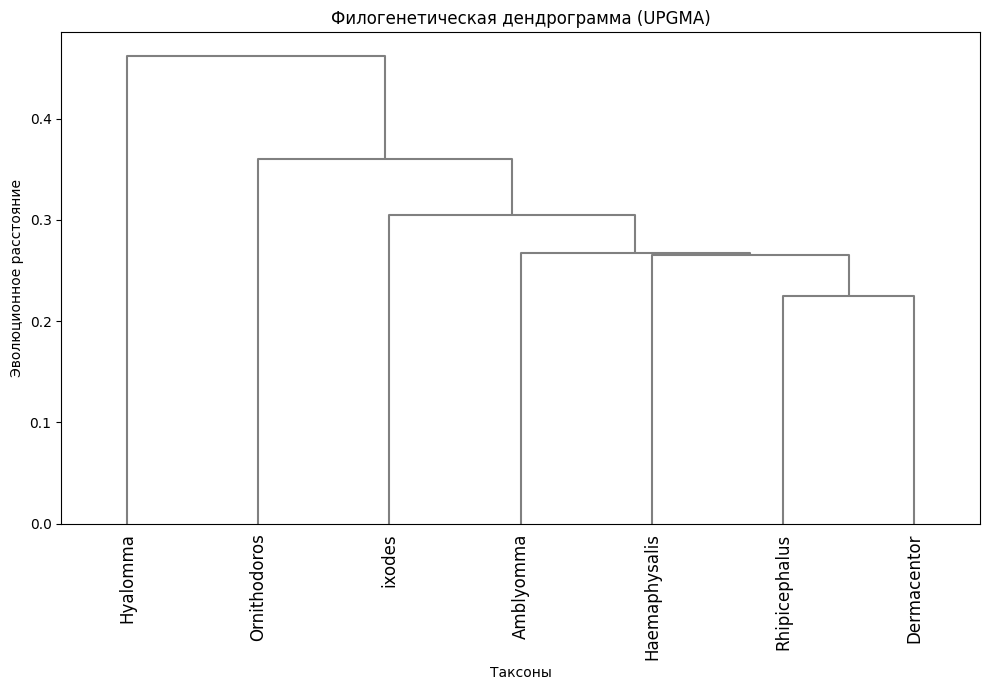

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Список таксонов
taxa = ["Ornithodoros", "ixodes", "Amblyomma", "Rhipicephalus", "Dermacentor", "Hyalomma", "Haemaphysalis"]

# Инициализация пустой матрицы
distance_matrix = np.zeros((7, 7))

# Заполнение матрицы расстояний
for i, taxon_i in enumerate(taxa):
    distances = tick_dict2[taxon_i]
    distance_matrix[i, :] = distances

# Проверка симметричности матрицы
assert np.allclose(distance_matrix, distance_matrix.T), "Матрица расстояний не симметрична!"

# Преобразование матрицы расстояний в конденсированную форму
condensed_distance = squareform(distance_matrix)

# Построение дерева с использованием метода UPGMA (average linkage)
linked = linkage(condensed_distance, method='complete')

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    labels=taxa,
    leaf_rotation=90,
    show_leaf_counts=True,
    above_threshold_color='grey',
    color_threshold=0
)
plt.title('Филогенетическая дендрограмма (UPGMA)')
plt.xlabel('Таксоны')
plt.ylabel('Эволюционное расстояние')
# plt.grid(True)
plt.tight_layout()
plt.savefig("phylogenetic_dendrogram.png", dpi=300)
plt.show()

# plt.figure(figsize=(15, 8), dpi=80)
# #data = [[1, 1], [2, 3], [3, 5],[4,5],[6,6],[7,5]]
# # points=["ixodes","amblyomma","dermacentor","haemophysalis","hyalomma","rhipicephalus", "ornithodoros"]
# #df = pd.DataFrame(data, columns=['xcord', 'ycord'],index=points)
# ytdist=distance_matrix
# linkage_matrix = linkage(ytdist, "complete")
# dendrogram(linkage_matrix, labels=labels)
# plt.show()



In [ ]:
import numpy as np
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt

# Данные
tick_dict2 = {
    "Ornithodoros": [0.000, 0.324, 0.358, 0.353, 0.359, 0.421, 0.360],
    "ixodes": [0.324, 0.000, 0.305, 0.304, 0.301, 0.363, 0.304],
    "Amblyomma": [0.358, 0.305, 0.000, 0.267, 0.263, 0.462, 0.266],
    "Rhipicephalus": [0.353, 0.304, 0.267, 0.000, 0.225, 0.443, 0.263],
    "Dermacentor": [0.359, 0.301, 0.263, 0.225, 0.000, 0.405, 0.265],
    "Hyalomma": [0.421, 0.363, 0.462, 0.443, 0.405, 0.000, 0.456],
    "Haemaphysalis": [0.360, 0.304, 0.266, 0.263, 0.265, 0.456, 0.000]
}

taxa = ["Ornithodoros", "ixodes", "Amblyomma", "Rhipicephalus", "Dermacentor", "Hyalomma", "Haemaphysalis"]

# Создание матрицы расстояний
distance_matrix = np.zeros((len(taxa), len(taxa)))
for i, taxon_i in enumerate(taxa):
    distances = tick_dict2[taxon_i]
    distance_matrix[i, :] = distances

# Проверка и исправление симметричности матрицы
if not np.allclose(distance_matrix, distance_matrix.T):
    print("Матрица расстояний не симметрична. Исправляем...")
    distance_matrix = (distance_matrix + distance_matrix.T) / 2

# Преобразование в DistanceMatrix
lower_triangle = []
for i in range(1, len(taxa)):
    row = list(distance_matrix[i, :i])
    lower_triangle.append(row)

dm = DistanceMatrix(taxa, lower_triangle)

# Построение дерева методом Neighbor Joining
constructor = DistanceTreeConstructor()
nj_tree = constructor.nj(dm)

# Визуализация дерева
fig, ax = plt.subplots(figsize=(12, 8))
Phylo.draw(nj_tree, do_show=False, axes=ax, branch_labels=lambda c: round(c.branch_length, 4))
ax.set_title('Филогенетическое дерево (Neighbor Joining)', fontsize=16)
plt.show()




ValueError: 'names' and 'matrix' should be the same size

In [ ]:
distance_matrix = np.array([
    [0.000, 0.324, 0.358, 0.353, 0.359, 0.421, 0.360],
    [0.324, 0.000, 0.305, 0.304, 0.301, 0.363, 0.304],
    [0.358, 0.305, 0.000, 0.267, 0.263, 0.462, 0.266],
    [0.353, 0.304, 0.267, 0.000, 0.225, 0.443, 0.263],
    [0.359, 0.301, 0.263, 0.225, 0.000, 0.405, 0.265],
    [0.421, 0.363, 0.462, 0.443, 0.405, 0.000, 0.456],
    [0.360, 0.304, 0.266, 0.263, 0.265, 0.456, 0.000]

In [ ]:
import pandas as pd
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6), dpi=80)
#data = [[1, 1], [2, 3], [3, 5],[4,5],[6,6],[7,5]]
points=["ixodes","amblyomma","dermacentor","haemophysalis","hyalomma","rhipicephalus", "ornithodoros"]
#df = pd.DataFrame(data, columns=['xcord', 'ycord'],index=points)
ytdist=mtx
linkage_matrix = linkage(ytdist, "single")
dendrogram(linkage_matrix, labels=points)
plt.show()

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.5 MB/s eta 0:00:00


<ipython-input-21-91fc3b4ad2ea>:43: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(ytdist, "complete")


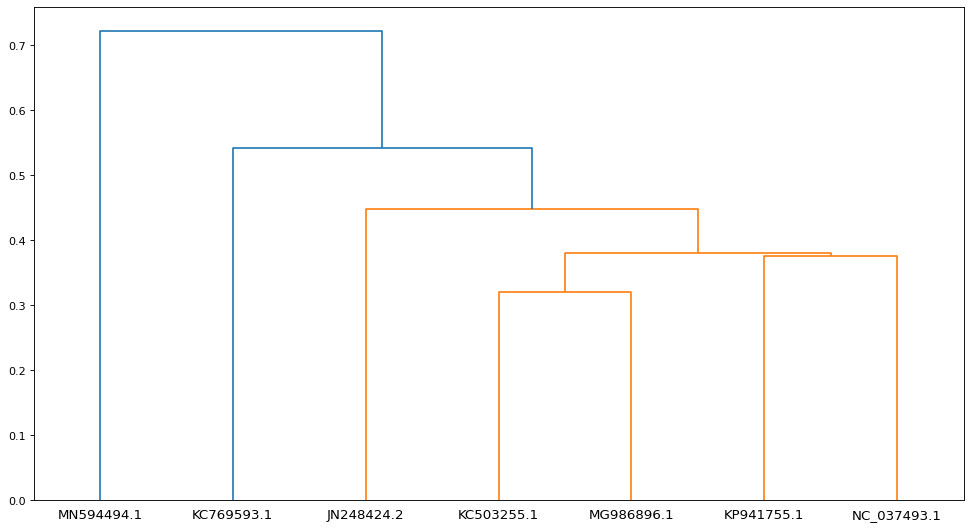

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

# Матрица расстояний
# distance_matrix = np.array([
    [0.000, 0.324, 0.358, 0.353, 0.359, 0.421, 0.360],
    [0.324, 0.000, 0.305, 0.304, 0.301, 0.363, 0.304],
    [0.358, 0.305, 0.000, 0.267, 0.263, 0.462, 0.266],
    [0.353, 0.304, 0.267, 0.000, 0.225, 0.443, 0.263],
    [0.359, 0.301, 0.263, 0.225, 0.000, 0.405, 0.265],
    [0.421, 0.363, 0.462, 0.443, 0.405, 0.000, 0.456],
    [0.360, 0.304, 0.266, 0.263, 0.265, 0.456, 0.000]
# ])

# # Имена таксонов
# labels = ["KC769593.1", "JN248424.2", "KP941755.1", "KC503255.1", "MG986896.1", "MN594494.1", "NC_037493.1"]

# # Преобразуем матрицу расстояний в формат, подходящий для метода linkage
# condensed_matrix = distance_matrix[np.triu_indices(len(distance_matrix), 1)]

# # Построение древа методом UPGMA (average linkage)
# Z = linkage(condensed_matrix, method='average')

# # Визуализация древа
# plt.figure(figsize=(10, 7))
# dendrogram(Z, labels=labels, leaf_rotation=90, leaf_font_size=10)
# plt.title('Филогенетическое древо (UPGMA)')
# plt.xlabel('Таксоны')
# plt.ylabel('Расстояние')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(15, 8), dpi=80)
#data = [[1, 1], [2, 3], [3, 5],[4,5],[6,6],[7,5]]
# points=["ixodes","amblyomma","dermacentor","haemophysalis","hyalomma","rhipicephalus", "ornithodoros"]
#df = pd.DataFrame(data, columns=['xcord', 'ycord'],index=points)
ytdist=distance_matrix
linkage_matrix = linkage(ytdist, "complete")
dendrogram(linkage_matrix, labels=labels)
plt.show()


In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.3 MB/s eta 0:00:00


ValueError: Keyword argument "branch_length=None" is not in the format pyplot_option_name=(tuple), pyplot_option_name=(tuple, dict), or pyplot_option_name=(dict) 

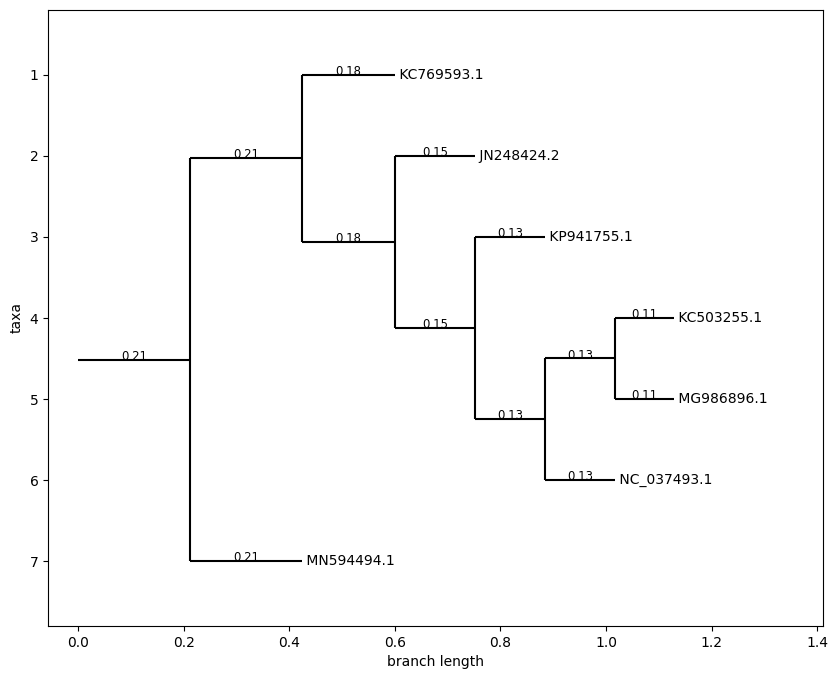

In [ ]:
from Bio import Phylo
import matplotlib.pyplot as plt
from io import StringIO

# Ваши данные в формате Newick
newick_data = """
(
(
KC769593.1:0.17533,
(
JN248424.2:0.151721,
(
KP941755.1:0.132709,
(
(
KC503255.1:0.112448,
MG986896.1:0.112448):0.131987,
NC_037493.1:0.131987):0.132709):0.151721):0.17533):0.212428,
MN594494.1:0.212428):0.212428;
"""

# Загрузка данных из строки в формате Newick
tree = Phylo.read(StringIO(newick_data), "newick")

# Настройка визуализации дендрограммы
fig, ax = plt.subplots(figsize=(10, 8))
#Phylo.draw(tree, do_show=False, branch_labels=lambda c: round(c.branch_length, 2), axes=ax)
# Рисуем дерево с выравнением ветвей
Phylo.draw(tree, do_show=False, branch_labels=lambda c: round(c.branch_length, 2), axes=ax, branch_length=None)

# Дополнительные настройки для более красивой визуализации
ax.set_title('Филогенетическое древо', fontsize=16)
ax.set_xlabel('Эволюционное расстояние', fontsize=12)
ax.set_ylabel('Таксоны', fontsize=12)
plt.grid(True)

# Сохранение изображения
plt.savefig("dendrogram.png", dpi=300)
plt.show()


In [ ]:
ticks = {"Bothriocroton undatum": [13],
         "Bothriocroton concolor": [],
         "Amblyomma sphenodonti": [],
         "Haemaphysalis flava": [],
         "Amblyomma elaphense": [],
         "Rhipicephalus sanguineus": [],
         "Mblyomma trigutattum": [],
         "Amblyomma fimbriatum": [],
         "Ixodes holocyclus": [1],
         "Ixodes uriae": [1],
         "Ixodes hexagonus": [],
         "Ixodes persulcatus": [],
         "Carios capensis": [],
         "Ornithodoros porcinus": [],
         "Orhithodoros moubdata": []}

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import hamming

In [ ]:
tick_df = pd.DataFrame(tick_dict)

In [ ]:
hamming_matrix = np.zeros((tick_df.shape[1], tick_df.shape[1]))
for i in range(tick_df.shape[1]):
    for j in range(tick_df.shape[1]):
        hamming_matrix[i, j] = hamming(tick_df.iloc[:, i], tick_df.iloc[:, j])

In [ ]:
hamming_df = pd.DataFrame(hamming_matrix, index=tick_dict.keys(), columns=tick_dict.keys())

In [ ]:
print(hamming_df)

               ixodes  amblyomma  dermacentor  haemophysalis  hyalomma  \
ixodes         0.0000     0.9375       1.0000         0.8750    1.0000   
amblyomma      0.9375     0.0000       0.7500         0.8125    0.7500   
dermacentor    1.0000     0.7500       0.0000         0.6250    0.9375   
haemophysalis  0.8750     0.8125       0.6250         0.0000    0.9375   
hyalomma       1.0000     0.7500       0.9375         0.9375    0.0000   
rhipicephalus  0.8750     0.7500       0.8125         0.7500    0.6250   
ornithodoros   1.0000     0.6875       0.7500         0.7500    0.6875   

               rhipicephalus  ornithodoros  
ixodes                0.8750        1.0000  
amblyomma             0.7500        0.6875  
dermacentor           0.8125        0.7500  
haemophysalis         0.7500        0.7500  
hyalomma              0.6250        0.6875  
rhipicephalus         0.0000        0.8125  
ornithodoros          0.8125        0.0000  


<ipython-input-22-55d47176523d>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(hamming_matrix, 'complete')


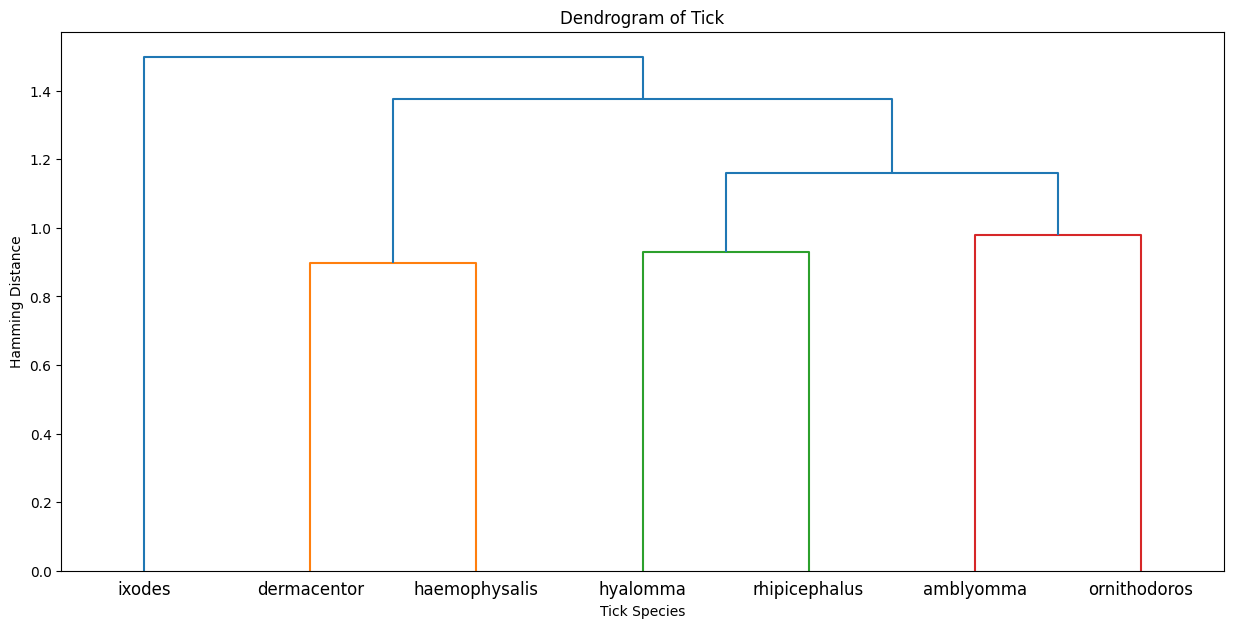

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(hamming_matrix, 'complete')

plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           labels=list(tick_dict.keys()),
           distance_sort='ascending',
           show_leaf_counts=True)

plt.title("Dendrogram of Tick")
plt.xlabel("Tick Species")
plt.ylabel("Hamming Distance")
plt.show()


In [ ]:
from scipy.spatial import distance

In [ ]:
for k in tick_dict:
  print(len(tick_dict[k]))

16
16
16
16
16
16
16


In [ ]:
mtx = []
for i in tick_dict:
  lst = []
  for j in tick_dict:
    dst = distance.euclidean(tick_dict[i], tick_dict[j])
    lst.append(round(dst, 2))
  mtx.append(lst)

print(mtx)

[[0.0, 37.58, 30.9, 34.47, 41.01, 40.12, 44.83], [37.58, 0.0, 13.53, 13.86, 7.48, 8.0, 9.27], [30.9, 13.53, 0.0, 8.89, 17.18, 14.32, 20.47], [34.47, 13.86, 8.89, 0.0, 14.9, 11.05, 18.22], [41.01, 7.48, 17.18, 14.9, 0.0, 4.9, 5.1], [40.12, 8.0, 14.32, 11.05, 4.9, 0.0, 8.0], [44.83, 9.27, 20.47, 18.22, 5.1, 8.0, 0.0]]


In [ ]:
for i in mtx:
  print(i)

[0.0, 37.58, 30.9, 34.47, 41.01, 40.12, 44.83]
[37.58, 0.0, 13.53, 13.86, 7.48, 8.0, 9.27]
[30.9, 13.53, 0.0, 8.89, 17.18, 14.32, 20.47]
[34.47, 13.86, 8.89, 0.0, 14.9, 11.05, 18.22]
[41.01, 7.48, 17.18, 14.9, 0.0, 4.9, 5.1]
[40.12, 8.0, 14.32, 11.05, 4.9, 0.0, 8.0]
[44.83, 9.27, 20.47, 18.22, 5.1, 8.0, 0.0]


<ipython-input-9-965010074a31>:10: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(ytdist, "single")


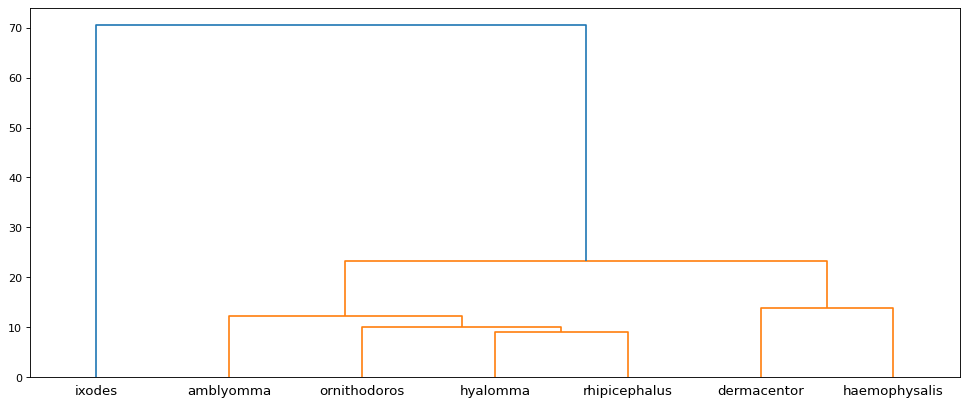

In [ ]:
import pandas as pd
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6), dpi=80)
#data = [[1, 1], [2, 3], [3, 5],[4,5],[6,6],[7,5]]
points=["ixodes","amblyomma","dermacentor","haemophysalis","hyalomma","rhipicephalus", "ornithodoros"]
#df = pd.DataFrame(data, columns=['xcord', 'ycord'],index=points)
ytdist=mtx
linkage_matrix = linkage(ytdist, "single")
dendrogram(linkage_matrix, labels=points)
plt.show()

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 57.9 MB/s eta 0:00:00


In [ ]:
bact = ["Anaplasma", "Babesia", "Bartonella", "Borrelia",
        "Coxiella", "Ehrlichia", "Francisella", "Rickettsia",
        "Wolbachia"]

In [ ]:
tick = ["Ixodes", "Amblyomma", "Dermacentor",
        "Haemophysalis", "Hyalomma", "Rhipicephalus",
        "Ornithodoros"]

In [ ]:
from Bio import Entrez
Entrez.email = "ministreliya13113@gmail.com"  # Always tell NCBI who you are

for b in bact:
  stream1 = Entrez.esearch(db="pubmed", term=f'("{b}" AND "tick") OR ("{b}" AND "mite") OR ("{b}" AND "ticks") OR ("{b}" AND "mites") AND ("metagenome" OR "metagenomics")', retmax="5000")
  record1 = Entrez.read(stream1)
  pmid_lst1 = record1['IdList']

  stream2 = Entrez.esearch(db="pubmed", term=f'("{b}" AND "tick") OR ("{b}" AND "mite") OR ("{b}" AND "ticks") OR ("{b}" AND "mites") AND ("proteome" OR "proteomics")', retmax="5000")
  record2 = Entrez.read(stream2)
  pmid_lst2 = record2['IdList']

  stream3 = Entrez.esearch(db="pubmed", term=f'("{b}" AND "tick") OR ("{b}" AND "mite") OR ("{b}" AND "ticks") OR ("{b}" AND "mites") AND ("metabolome" OR "metabolomics")', retmax="5000")
  record3 = Entrez.read(stream3)
  pmid_lst3 = record3['IdList']

  stream4 = Entrez.esearch(db="pubmed", term=f'("{b}" AND "tick") OR ("{b}" AND "mite") OR ("{b}" AND "ticks") OR ("{b}" AND "mites") AND ("behavioral" OR "behavior")', retmax="5000")
  record4 = Entrez.read(stream4)
  pmid_lst4 = record4['IdList']

  my_fle = open(f'{b}.txt', 'w')
  for pmid in pmid_lst1:
    print(pmid, file=my_fle)

  for pmid in pmid_lst2:
    print(pmid, file=my_fle)

  for pmid in pmid_lst3:
    print(pmid, file=my_fle)

  for pmid in pmid_lst4:
    print(pmid, file=my_fle)

  my_fle.close()

In [ ]:
import os
import time

for f in sorted(os.listdir()):
  if "txt" in f:
    #print(f)
    medline_f = open(f"{f.split('.')[0]}_medline", "w")

    pmid_f = open(f)
    for line in pmid_f:
      time.sleep(0.4)
      try:
        stream_2 = Entrez.efetch(db="pubmed",
                                id=line.strip(),
                                rettype="medline",
                                retmode="text")
      except:
        print(line.strip())
      rec = stream_2.read()
      medline_f.write(rec)
    pmid_f.close()

    medline_f.close()

In [ ]:
from Bio import Medline

f5 = open(f"bact_meshes.txt", "w")
for b in bact:
  with open(f"{b}_medline") as handle:
    records = Medline.parse(handle)
    my_mesh = []
    for record in records:
      try:
        my_mesh += record["MH"]
        #print(record['MH'])
      except KeyError:
        print("No MeSH")
    print(b, len(my_mesh), "|".join(list(set(my_mesh))), sep=";", file=f5)
f5.close()

No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH


In [ ]:
Entrez.email = "ministreliya13113@gmail.com"  # Always tell NCBI who you are

for t in tick:
  stream1 = Entrez.esearch(db="pubmed", term=f'"{t}" AND ("metagenome" OR "metagenomics")', retmax="5000")
  record1 = Entrez.read(stream1)
  pmid_lst1 = record1['IdList']

  stream2 = Entrez.esearch(db="pubmed", term=f'"{t}" AND ("proteome" OR "proteomics")', retmax="5000")
  record2 = Entrez.read(stream2)
  pmid_lst2 = record2['IdList']

  stream3 = Entrez.esearch(db="pubmed", term=f'"{t}" AND ("metabolome" OR "metabolomics")', retmax="5000")
  record3 = Entrez.read(stream3)
  pmid_lst3 = record3['IdList']

  time.sleep(0.4)
  stream4 = Entrez.esearch(db="pubmed", term=f'"{t}" AND ("behavioral" OR "behavior")', retmax="5000")
  record4 = Entrez.read(stream4)
  pmid_lst4 = record4['IdList']

  my_fle = open(f'{t}.txt', 'w')
  for pmid in pmid_lst1:
    print(pmid, file=my_fle)

  for pmid in pmid_lst2:
    print(pmid, file=my_fle)

  for pmid in pmid_lst3:
    print(pmid, file=my_fle)

  for pmid in pmid_lst4:
    print(pmid, file=my_fle)

  my_fle.close()

In [ ]:
for f in sorted(os.listdir()):
  if "txt" in f:
    #print(f)
    medline_f = open(f"{f.split('.')[0]}_medline", "w")

    pmid_f = open(f)
    for line in pmid_f:
      time.sleep(0.4)
      try:
        stream_2 = Entrez.efetch(db="pubmed",
                                id=line.strip(),
                                rettype="medline",
                                retmode="text")
      except:
        print(line.strip())
      rec = stream_2.read()
      medline_f.write(rec)
    pmid_f.close()

    medline_f.close()

In [ ]:
f6 = open(f"ticks_meshes.txt", "w")
for t in tick:
  with open(f"{t}_medline") as handle:
    records = Medline.parse(handle)
    my_mesh = []
    for record in records:
      try:
        my_mesh += record["MH"]
        #print(record['MH'])
      except KeyError:
        print("No MeSH")
    print(t, len(my_mesh), "|".join(list(set(my_mesh))), sep=";", file=f6)
f5.close()

No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH
No MeSH


Anaplasma 1317 Genome, Bacterial/*genetics|*Anaplasma phagocytophilum|Septins/classification/genetics/metabolism|Ixodes/microbiology|*Anaplasma/genetics/isolation & purification/pathogenicity/classification|Lipocalins/antagonists & inhibitors|Birds/parasitology|Ehrlichiosis/microbiology/*transmission|Antibodies/blood|Ticks/microbiology/parasitology/*physiology|Anaplasmosis/*immunology/microbiology|Protein Structure, Tertiary/genetics|*Tick-Borne Diseases/epidemiology/veterinary|Tibet|Bacterial Vaccines/*immunology|Bacterial Proteins/*immunology/isolation & purification|Ixodidae/growth & development/*microbiology/*physiology|Salivary Proteins and Peptides/genetics/*metabolism|Borrelia/*genetics|Horses/parasitology|Sheep/*metabolism|Population Surveillance|Babesiosis/*epidemiology/parasitology|Anaplasmosis/epidemiology/*prevention & control|Hydrogen-Ion Concentration|Ixodes/growth & development/*microbiology/virology|Ticks/*metabolism/*microbiology|Raccoons|Cattle Diseases/*transmission|

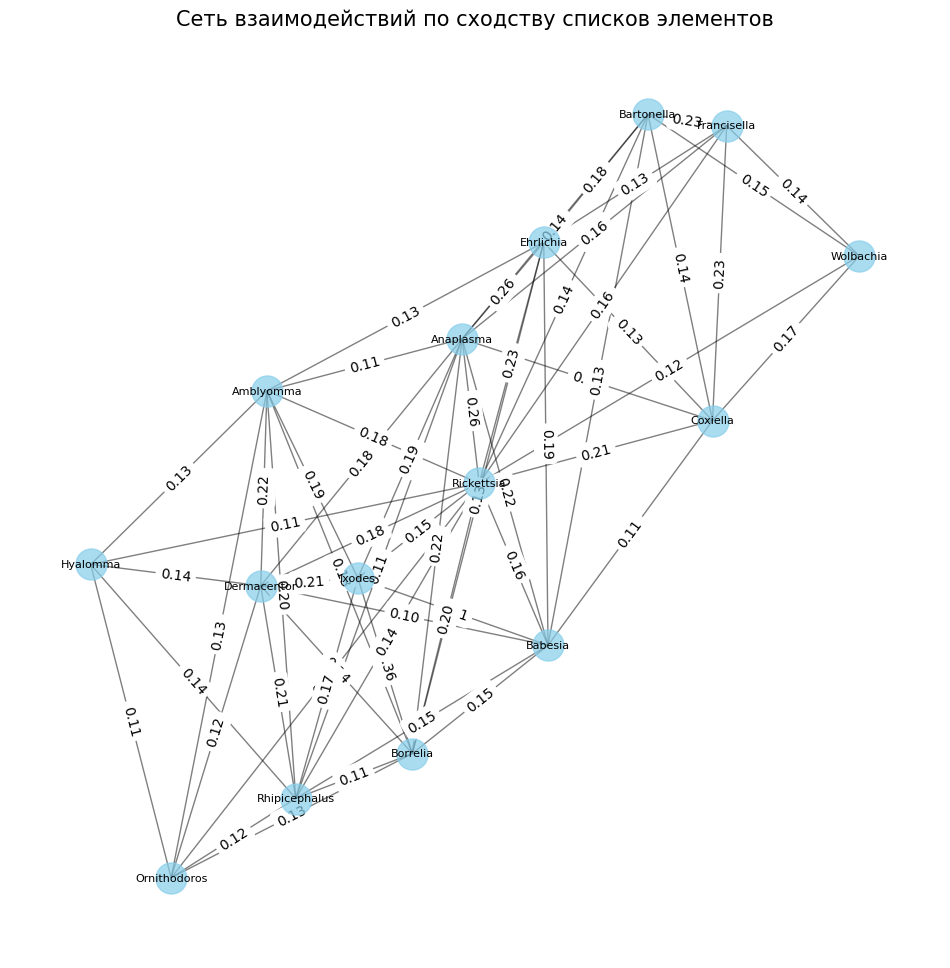

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Функция для вычисления коэффициента Жаккара
def jaccard_similarity(set1, set2):
    intersection_len = len(set1.intersection(set2))
    union_len = len(set1.union(set2))
    return intersection_len / union_len if union_len > 0 else 0

# Загрузите данные из CSV файла
data = pd.read_csv('all_meshes.txt', header=None, sep=';')

# Создаем словарь для хранения множеств элементов
element_sets = {}

for index, row in data.iterrows():
    primary_term = row[0]
    # Разделяем элементы и добавляем их в множество
    print(row[0], row[1], row[2])
    related_terms = set(row[2].split('|'))
    element_sets[primary_term] = related_terms

# Создаем граф
G = nx.Graph()

# Вычисляем сходство для всех пар узлов
threshold = 0.1  # Задайте порог сходства

for term1, term2 in combinations(element_sets.keys(), 2):
    similarity = jaccard_similarity(element_sets[term1], element_sets[term2])
    if similarity > threshold:
        G.add_edge(term1, term2, weight=similarity)

# Визуализация сети
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

# Добавляем значения весов на граф
edge_labels = {(term1, term2): f"{data['weight']:.2f}" for term1, term2, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Показать график
plt.title('Сеть взаимодействий по сходству списков элементов', fontsize=15)
plt.axis('off')
plt.show()

In [ ]:
!pip install pyvis

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 25.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import pandas as pd
from pyvis.network import Network
from itertools import combinations

# Функция для вычисления коэффициента Жаккара
def jaccard_similarity(set1, set2):
    intersection_len = len(set1.intersection(set2))
    union_len = len(set1.union(set2))
    return intersection_len / union_len if union_len > 0 else 0

# Загрузите данные из CSV файла
data = pd.read_csv('all_meshes.txt', header=None, sep=';')

# Создаем словарь для хранения множеств элементов
element_sets = {}
sizes = {}

for index, row in data.iterrows():
    primary_term = row[0]
    related_terms = set(row[2].split('|'))
    element_sets[primary_term] = related_terms
    # Сохраняем размер для каждого термина
    sizes[primary_term] = 10  # Предполагается, что размер в колонке 1

# Список узлов, для которых нужно изменить форму
tick = ["Ixodes", "Amblyomma", "Dermacentor",
        "Haemophysalis", "Hyalomma", "Rhipicephalus",
        "Ornithodoros"]

# Создаем интерактивную сеть с помощью Pyvis
net = Network(notebook=True)

# Вычисляем сходство для всех пар узлов
threshold = 0.1  # Задайте порог сходства

for term1, term2 in combinations(element_sets.keys(), 2):
    similarity = jaccard_similarity(element_sets[term1], element_sets[term2])
    if similarity > threshold:
        # Устанавливаем параметры для узлов на основе значений из CSV
        size1 = sizes[term1]
        size2 = sizes[term2]

        # Добавляем узлы
        net.add_node(term1, size=size1, title=term1)
        net.add_node(term2, size=size2, title=term2)

        # Добавляем связь
        net.add_edge(term1, term2, width=similarity, smooth={'type': 'continuous'})  # Установка угловатых связей

# Устанавливаем физику
net.force_atlas_2based(gravity=-50, central_gravity=0.01, spring_length=100, spring_strength=0.08)

# Сохраняем и отображаем граф
net.show('network.html')

network.html


In [ ]:
f7 = open(f"ticks_journals.txt", "w")
for t in tick:
  with open(f"{t}_medline") as handle:
    records = Medline.parse(handle)
    for record in records:
      try:
        print(record["JT"], file=f7)
        #print(record['MH'])
      except KeyError:
        print("No Journal")
f7.close()